In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

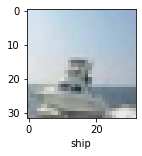

In [14]:
plot_sample(X_train, y_train, 100)

### NORMALIZING THE DATA

In [15]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### Build simple artificial neural network for image classification

In [16]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 116s 74ms/step - loss: 1.8117 - accuracy: 0.3541
Epoch 2/5
1563/1563 [==============================] - 115s 73ms/step - loss: 1.6262 - accuracy: 0.4249
Epoch 3/5
1563/1563 [==============================] - 116s 74ms/step - loss: 1.5411 - accuracy: 0.4563
Epoch 4/5
1563/1563 [==============================] - 116s 74ms/step - loss: 1.4818 - accuracy: 0.4777
Epoch 5/5
1563/1563 [==============================] - 114s 73ms/step - loss: 1.4333 - accuracy: 0.4935


In [17]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 9s 28ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.42      0.49      1000
           1       0.47      0.70      0.56      1000
           2       0.44      0.15      0.22      1000
           3       0.36      0.32      0.34      1000
           4       0.30      0.69      0.42      1000
           5       0.48      0.25      0.33      1000
           6       0.61      0.38      0.47      1000
           7       0.67      0.38      0.49      1000
           8       0.39      0.83      0.53      1000
           9       0.61      0.28      0.38      1000

    accuracy                           0.44     10000
   macro avg       0.49      0.44      0.42     10000
weighted avg       0.49      0.44      0.42     10000



### Now let us build a convolutional neural network to train our images

In [18]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [19]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 78s 49ms/step - loss: 1.4323 - accuracy: 0.4900
Epoch 2/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.0878 - accuracy: 0.6182
Epoch 3/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.9692 - accuracy: 0.6639
Epoch 4/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8806 - accuracy: 0.6928
Epoch 5/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8138 - accuracy: 0.7186
Epoch 6/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7545 - accuracy: 0.7378
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7060 - accuracy: 0.7529
Epoch 8/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.6629 - accuracy: 0.7679
Epoch 9/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.6175 - accuracy: 0.7824
Epoch 10/10
1563/1563 [==============================] - 70s 45m

In [22]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.9448 - accuracy: 0.6976


[0.9448491930961609, 0.6976000070571899]

In [23]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 5s 16ms/step


array([[9.3943859e-04, 3.4368542e-05, 1.9615101e-04, 9.8669505e-01,
        1.6381545e-06, 1.2009606e-02, 1.7698954e-05, 1.5920196e-07,
        1.0328736e-04, 2.5613012e-06],
       [1.0618183e-03, 4.2617425e-02, 3.8862018e-07, 2.6679591e-05,
        3.8592277e-10, 2.5981560e-08, 2.3152300e-07, 3.9424117e-11,
        9.5619500e-01, 9.8349105e-05],
       [3.2043416e-02, 2.0608003e-01, 8.4818611e-03, 6.0477592e-03,
        8.5504923e-04, 1.1225913e-03, 8.8133110e-04, 3.5189190e-03,
        5.2875131e-01, 2.1221763e-01],
       [4.5881230e-01, 1.2034475e-01, 2.3679629e-03, 1.6762733e-03,
        2.0366663e-04, 1.1320501e-05, 7.5439702e-06, 5.3052449e-06,
        4.1597429e-01, 5.9655530e-04],
       [5.1493259e-07, 4.0400860e-06, 4.3511346e-02, 6.3131504e-02,
        3.3087882e-01, 3.0832766e-03, 5.5932158e-01, 1.9263331e-05,
        4.5861256e-05, 3.8204503e-06]], dtype=float32)

In [24]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [25]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

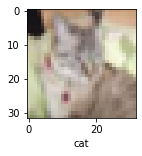

In [27]:
plot_sample(X_test, y_test,8)

In [28]:
classes[y_classes[3]]

'airplane'

In [29]:
classes[y_classes[3]]

'airplane'

In [30]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.71      0.72      1000
           1       0.85      0.80      0.83      1000
           2       0.49      0.72      0.59      1000
           3       0.49      0.59      0.54      1000
           4       0.78      0.51      0.61      1000
           5       0.69      0.51      0.59      1000
           6       0.82      0.72      0.77      1000
           7       0.77      0.75      0.76      1000
           8       0.77      0.86      0.81      1000
           9       0.76      0.81      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.72      0.70      0.70     10000
weighted avg       0.72      0.70      0.70     10000

